<a href="https://colab.research.google.com/github/ch0t8881/IITM-Data-Science-GUVI-Projects---/blob/main/Task_5_Assignment_3_adoptusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 5 :Identify which factors predict future user adoption.

**Objective** Our goal is to


identify which factors predict future user adoption


*   Define an "adopted user" as one who has logged into the product on 3 separate days in at least 1 seven-day period.
*   Identify which factors predict future user adoption
*   Ideas for further research analysis.














In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the first dataset "users" with Greek encoding since there were errors without encoding
a_users = pd.read_csv('/content/takehome_users.csv',encoding='Greek')
a_users.head()

In [9]:
a_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
a_users.describe(include='all')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000,12000,12000,12000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
unique,NaN,11996,11355,11980,5,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-02-11 17:57:53,Araujo Gabriela,AlfieLane@yahoo.com,ORG_INVITE,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,5,2,4254,NaN,NaN,NaN,NaN,NaN
mean,6000.50000,NaN,NaN,NaN,NaN,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,NaN,NaN,NaN,NaN,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,NaN,NaN,NaN,NaN,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,NaN,NaN,NaN,NaN,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,NaN,NaN,NaN,NaN,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,NaN,NaN,NaN,NaN,1.398443e+09,0.000000,0.000000,238.250000,8817.000000


In [10]:
a_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [13]:
a_users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [ ]:
!pip3 install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 5.2 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 690 kB 45.7 MB/s 
     |████████████████████████████████| 102 kB 8.3 MB/s 
     |████████████████████████████████| 4.7 MB 9.3 MB/s 
     |████████████████████████████████| 812 kB 53.9 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=11bd0300accd01d3f15435f0738dccff7c3e998bc9e8a0090a0f75c0fac14726
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=f0d360823fbc72e3b52fb2e0a29b9f89b669f73e638c4d9236d8844c8ea89833
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin ima

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(a_users)
profile

###From the data above the last_session_creation_time column is not a datetime object and that there are much fewer data in this column. There are also significant missing values in the invited_by_user_id column.

In [15]:
# Load user engagement data
engagement = pd.read_csv('/content/takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
engagement.describe(include='all')

,time_stamp,user_id,visited
count,207917,207917.000000,207917.0
unique,207220,NaN,NaN
top,2013-04-06 21:21:37,NaN,NaN
freq,2,NaN,NaN
mean,NaN,5913.314197,1.0
std,NaN,3394.941674,0.0
min,NaN,1.000000,1.0
25%,NaN,3087.000000,1.0
50%,NaN,5682.000000,1.0
75%,NaN,8944.000000,1.0


In [18]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [17]:
engagement.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

The engagement data has no missing values and contain visited data for each user with a time_stamp and user_id on each row of the 207,917 entries.

**Defining adopted users**

After our brief EDA analysis we will use our engagement data to engineer a new feature called "adopted users" based on if they have logged into the product on three separate days in at least one seven-day period.

How many values does 'visited' take?

In [19]:
sorted(list(engagement['visited'].unique()))

[1]

In [20]:
print('There are {} unique users of the 207,917 entries in engagement data'\
      .format(len(engagement['user_id'].unique())))

There are 8823 unique users of the 207,917 entries in engagement data


Narrowing down users who logged in 3 times in total

In [22]:
three_logins = engagement.groupby('user_id').filter(lambda x: len(x) >=3)
print('There are {} unique users who logged in 3 times or more in total'\
      .format(len(three_logins['user_id'].unique())))

There are 2248 unique users who logged in 3 times or more in total


In [23]:
three_logins.head(2)

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1


In [25]:
#Removing index
three_logins.reset_index(drop=True, inplace = True)

#Finding how many of the 2248 unique three-logins users are adopted users 
# who have logged in three separate days in at least one 7 day period 

adopted = 0
adopted_users = []
for i in range(len(three_logins)-2):
    user = three_logins['user_id'][i]
    if user != adopted and user == three_logins['user_id'][i+2]:
    # Get start date 
        sd = pd.Timestamp(three_logins['time_stamp'][i])
        # 7 days period end date
        ed = sd + pd.Timedelta('7D')
        if sd < pd.Timestamp(three_logins['time_stamp'][i+1]) < ed and sd < \
        pd.Timestamp(three_logins['time_stamp'][i+2]) < ed:
            adopted_users.append(user)
            adopted = user

In [26]:
# Count how many adopted users there are 
len(adopted_users)

1602

In [27]:
# Add our new adopted_users feature to users dataframe: 1 for adopted and 0 for not-adopted

y = pd.Series(np.random.randn(len(a_users)))
n = 0
for i in range(len(a_users)):
    if a_users['object_id'][i] == adopted_users[n]:
        y[i] = 1
        n = n+1
        if n > len(adopted_users)-1:
            n = n -1
    else:
        y[i] = 0
        
users2 = pd.DataFrame(y, columns = ['adopted_users'])
df = pd.concat([a_users, users2], axis=1)
print((df[df['adopted_users'] == 1]).count())

object_id                     1602
creation_time                 1602
name                          1602
email                         1602
creation_source               1602
last_session_creation_time    1602
opted_in_to_mailing_list      1602
enabled_for_marketing_drip    1602
org_id                        1602
invited_by_user_id             913
adopted_users                 1602
dtype: int64


In [28]:
# We see above that some users were not invited by another user
# Construct another feature of invited: 1 for invited and 0 for wasn't invited 
inv = pd.Series(np.random.randn(len(df)))
for i in range(len(df)):
    if df['invited_by_user_id'][i] >=1:
        inv[i] = 1
    else:
        inv[i] = 0
df2 = pd.DataFrame(inv, columns = ['invited'])
df3 = pd.concat([df,df2], axis = 1)

In [29]:
df.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0


In [30]:
df2.head(2)

,invited
0,1.0
1,1.0


In [31]:
df3.head(2)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.0


**Predictive Modeling**

After defining our adopted users, we will now aim to identify which factors predict future users adoption using a classification machine learning model.

In [32]:
# We will first use one-hot encoding to transform our categorical features 
df3['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['ORG_INVITE','GUEST_INVITE','PERSONAL_PROJECTS','SIGNUP','SIGNUP_GOOGLE_AUTH'])

LabelEncoder()

In [38]:
creation = le.transform(df['creation_source'])

In [39]:
df4 = pd.DataFrame(creation, columns = ['creation'])
df = pd.concat([df3 ,df4], axis=1)
df.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users,invited,creation
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,1.0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,1.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,1.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0,1.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0.0,0.0,3
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0.0,0.0,2
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0.0,0.0,2
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0,1.0,1


In [40]:
# Import Extreme Gradient Boosting Classification Model 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create axes for labels and features
y = df['adopted_users']
X = df[['creation','last_session_creation_time','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id']]

# split data into train and test sets
seed = 1
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [42]:
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
X.columns

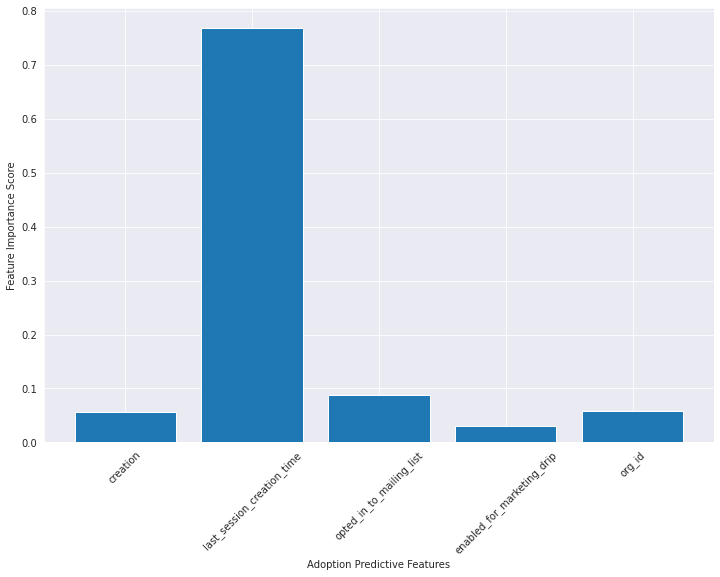

In [43]:
# Plot the feature importances for our target label of adopted users 
feat_imp = model.feature_importances_
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
xcol = X.columns
plt.xlabel('Adoption Predictive Features')
plt.ylabel('Feature Importance Score')
plt.xticks(range(len(xcol)), xcol.values, rotation=45)
plt.show()

In [44]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.28%


We see above that the XGBClassifier model does a good job in predicting whether a user will be an adopted user in the future and that the two most important features to determine adoption are the last login times of a user and the organization the users belong to.